In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
import numpy as np
import pandas as pd
import sys
import getpass
from functions import *
np.set_printoptions(precision=2)
pd.set_option('precision', 2)

## Reading in dataframe
and fixing students that don't behave properly
and anonymizing data to save as csv

In [2]:
df = pd.read_csv('C:\Users\\'+getpass.getuser()+'\\Google Drive\Sarah Ido folder\data\CCK\MATCHING_phet_cck_user_actions+sophistication_WITHPAUSE_anonymized.txt')
df_scores = pd.read_csv('C:\Users\\'+getpass.getuser()+'\\Google Drive\Sarah Ido folder\data\CCK\MATCHING_phet_cck_user_data_anonymized.txt')
df["student"] = df["student"].astype('category')
df_scores["student"] = df_scores["student"].astype('category')
df["Family"]=df["Family"].str.capitalize()

## Getting a sense of the data

In [3]:
actions = [np.mean([  df[ (df['student']==student) & 
            (df['Activity']=='a'+str(activity)) ].shape[0] for student in set(df['student'])  ]) for activity in [1,2,3]]
'''There are {0} students with an average number of actions of: {1:.2f} activity 1, {2:.2f} for activity 2, {3:.2f} for activity 3'''.format(len(set(df['student'])), actions[0],actions[1],actions[2])

'There are 96 students with an average number of actions of: 537.94 activity 1, 407.00 for activity 2, 81.83 for activity 3'

In [4]:
'''There are {0} different families of actions {1}'''.format(len(set(df['Family'])),set(df['Family']))

"There are 8 different families of actions set(['Reset', 'Pause', 'Extra', 'Test', 'Organize', 'Build', 'Interface', 'Revise'])"

In [5]:
df2 = df[df['Activity']=="a2"]
print "The following are the possible actions grouped by family:\n"
actionTypes = {}
for family in set(df2['Family']):
    actionTypes[family] = list(set(df2[df2['Family']==family]['Action']))
    print '{0}:\t {1}'.format(family,', '.join(list(set(df2[df2['Family']==family]['Action']))))

The following are the possible actions grouped by family:

Reset:	 reset
Pause:	 pause
Extra:	 moreVoltsOption, join, remove, changeResistance, sliderEndDrag, add, organizeWorkspace, joinX
Test:	 startMeasure, playPause, traceMeasure, endMeasure
Organize:	 organizeWorkspace
Build:	 join, reverse, switch, changeResistance, sliderEndDrag, add, changeVoltage, joinX
Interface:	 deiconified, help, iconified, exitSim, enableComponent, disableComponent, view
Revise:	 join, reverse, switch, remove, changeResistance, sliderEndDrag, add, split, changeVoltage, joinX


In [6]:
df.head()

,Activity,Time Stamp,Family,Action,Component,Outcome,#circuits,#loops,#components,#battery,#circuitSwitch,#grabBagResistor,#lightBulb,#resistor,#seriesAmmeter,student,Anon Student Id
0,a1,1363978501425,Build,add,lightBulb,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10009106,986526943
1,a1,1363978503940,Organize,organizeWorkspace,junction,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10009106,986526943
2,a1,1363978506034,Organize,organizeWorkspace,junction,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10009106,986526943
3,a1,1363978508034,Organize,organizeWorkspace,junction,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10009106,986526943
4,a1,1363978509800,Organize,organizeWorkspace,lightBulb,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10009106,986526943


In [7]:
df_scores.head()

,Wave,scaffolding,how many PhETs in the past?,how comfortable with phets?,p100,used this circuit sim before?,COMPLETEDNESS,PRIORKNOWLEDGE,COMPLEXITY,DIAGRAMS,...,z post t2,T0_PoCC,T1_PoCC,T2_PoCC,Avg_Mast_Or,Perceived Value,Clustergroups,fourgroups,student,Anon Student Id
0,March,scaff,2,2,0,0,1,1,1,0,...,0.33,2.67,2.78,2.67,4.0,3.50,attitude,scaffolded_attitude,1075123,1920143974
1,March,scaff,2,3,0,0,1,0,1,1,...,-0.12,2.44,3.11,3.33,4.5,3.25,attitude,scaffolded_attitude,3591123,-714775387
2,March,not,2,3,0,0,1,1,1,2,...,-0.72,2.22,2.78,2.44,3.5,3.00,attitude,notscaffolded_attitude,3932129,1194576952
3,March,scaff,2,3,1,1,1,1,1,2,...,-1.18,3.00,3.22,3.11,4.5,3.00,attitude,scaffolded_attitude,4762120,-450686147
4,July,not,1,2,1,0,1,0,1,0,...,-0.18,2.67,3.22,2.78,5.0,3.00,knowledge,notscaffolded_knowledge,4936123,-901793583


Next we check that we indeed have data for students in both tables. And of course we don't... so we remove those students.

Now I am going to define some functions to help us plot action pairs.

### Useful functions for plotting

## Descriptors
### How much is each action done? How does it depend on activity and condition?

In [8]:
"There are {} high knowledge students and {} high attitude students".format(len(get_students("Clustergroups","knowledge")),len(get_students("Clustergroups","attitude")))

'There are 30 high knowledge students and 66 high attitude students'

(0, 250)

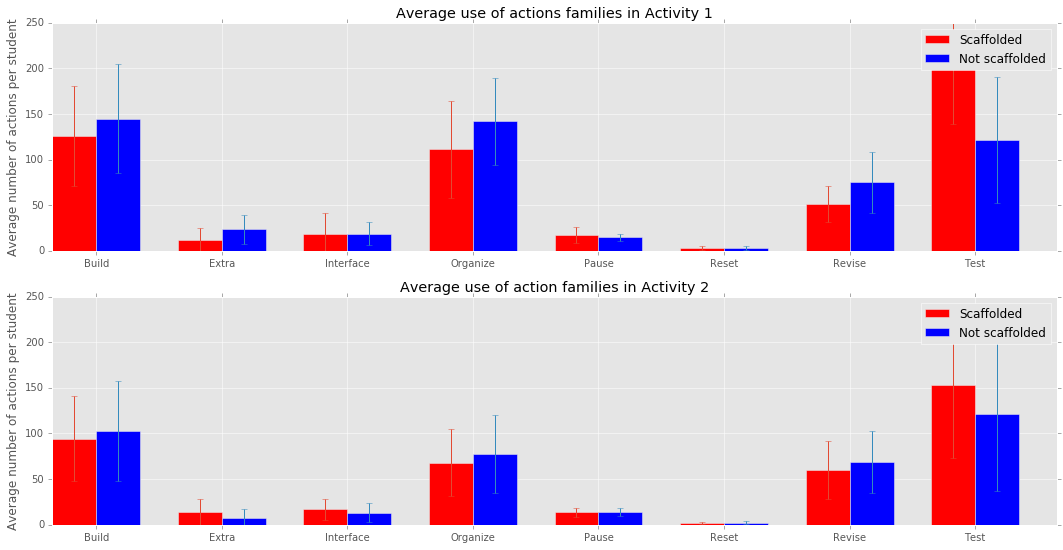

In [9]:
fig, axs = plt.subplots(nrows=2,ncols=1,figsize=(18,9))
ax = axs[0]
df2 = df[df['Activity']=="a1"]
df_copy = df2.copy()
df_copy['D'] = 1
width = 0.35

students = get_students("scaffolding",'scaff')
table = pd.pivot_table(df_copy[df_copy['student'].isin(students)], values='D', index=['Family'],columns=['student'], aggfunc=np.sum)
N=len(table.mean(axis=1, skipna=True))
rec1 = ax.bar(np.arange(N), table.mean(axis=1, skipna=True),width,color='r',yerr = table.std(axis=1, skipna=True))

students = get_students("scaffolding",'not')
table = pd.pivot_table(df_copy[df_copy['student'].isin(students)], values='D', index=['Family'],columns=['student'], aggfunc=np.sum)
rec2 = ax.bar(np.arange(N)+width, table.mean(axis=1, skipna=True),width,color='b',yerr = table.std(axis=1, skipna=True))
ax.set_xticks(np.arange(N) + width)
ax.set_xticklabels(table.mean(axis=1, skipna=True).keys())
ax.set_ylabel('Average number of actions per student')
ax.set_title('Average use of actions families in Activity 1')
ax.legend((rec1, rec2), ('Scaffolded', 'Not scaffolded'))
ax.set_ylim([0, 250])

ax = axs[1]
df2 = df[df['Activity']=="a2"]
df_copy = df2.copy()
df_copy['D'] = 1
students = get_students("scaffolding",'scaff')
table = pd.pivot_table(df_copy[df_copy['student'].isin(students)], values='D', index=['Family'],columns=['student'], aggfunc=np.sum)
rec1 = ax.bar(np.arange(N), table.mean(axis=1, skipna=True), width, color='r', yerr=table.std(axis=1, skipna=True))
students = get_students("scaffolding",'not')
table = pd.pivot_table(df_copy[df_copy['student'].isin(students)], values='D', index=['Family'],columns=['student'], aggfunc=np.sum)
rec2 = ax.bar(np.arange(N)+width, table.mean(axis=1, skipna=True),width,color='b',yerr = table.std(axis=1, skipna=True))
ax.set_xticks(np.arange(N) + width)
ax.set_xticklabels(table.mean(axis=1, skipna=True).keys())
ax.set_ylabel('Average number of actions per student')
ax.set_title('Average use of action families in Activity 2')
ax.legend((rec1, rec2), ('Scaffolded', 'Not scaffolded'))
ax.set_ylim([0, 250])

### How much is each action done? How does it depend on activity and student cluster?

(0, 250)

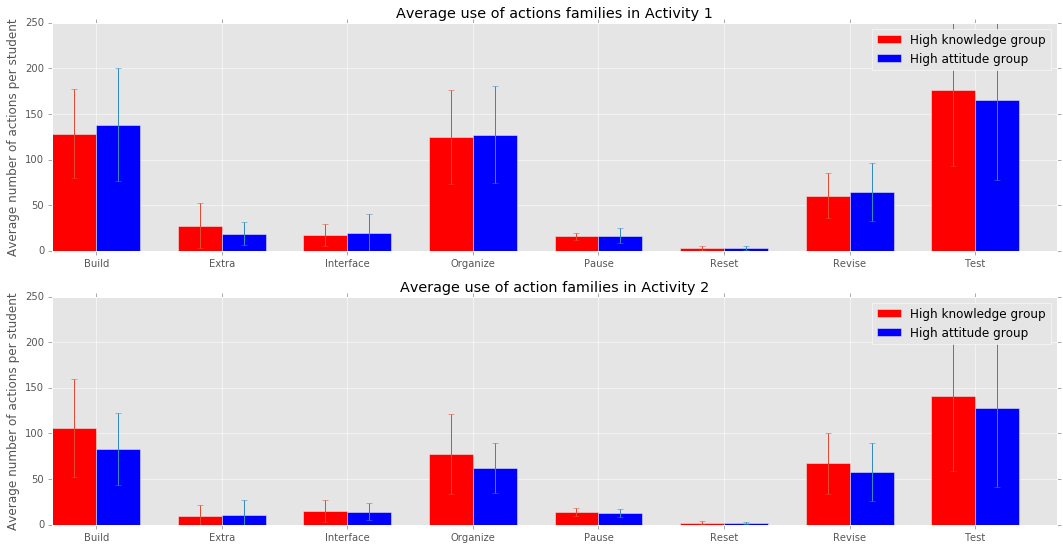

In [10]:
fig, axs = plt.subplots(nrows=2,ncols=1,figsize=(18,9))
ax = axs[0]
df2 = df[df['Activity']=="a1"]
df_copy = df2.copy()
df_copy['D'] = 1
width = 0.35

students = get_students("Clustergroups",'knowledge')
table = pd.pivot_table(df_copy[df_copy['student'].isin(students)], values='D', index=['Family'],columns=['student'], aggfunc=np.sum)
N=len(table.mean(axis=1, skipna=True))
rec1 = ax.bar(np.arange(N), table.mean(axis=1, skipna=True),width,color='r',yerr = table.std(axis=1, skipna=True))

students = get_students("Clustergroups",'attitude')
table = pd.pivot_table(df_copy[df_copy['student'].isin(students)], values='D', index=['Family'],columns=['student'], aggfunc=np.sum)
rec2 = ax.bar(np.arange(N)+width, table.mean(axis=1, skipna=True),width,color='b',yerr = table.std(axis=1, skipna=True))
ax.set_xticks(np.arange(N) + width)
ax.set_xticklabels(table.mean(axis=1, skipna=True).keys())
ax.set_ylabel('Average number of actions per student')
ax.set_title('Average use of actions families in Activity 1')
ax.legend((rec1, rec2), ('High knowledge group', 'High attitude group'))
ax.set_ylim([0, 250])

ax = axs[1]
df2 = df[df['Activity']=="a2"]
df_copy = df2.copy()
df_copy['D'] = 1
students = get_students("Clustergroups",'attitude')
table = pd.pivot_table(df_copy[df_copy['student'].isin(students)], values='D', index=['Family'],columns=['student'], aggfunc=np.sum)
rec1 = ax.bar(np.arange(N), table.mean(axis=1, skipna=True), width, color='r', yerr=table.std(axis=1, skipna=True))
students = get_students("Clustergroups",'knowledge')
table = pd.pivot_table(df_copy[df_copy['student'].isin(students)], values='D', index=['Family'],columns=['student'], aggfunc=np.sum)
rec2 = ax.bar(np.arange(N)+width, table.mean(axis=1, skipna=True),width,color='b',yerr = table.std(axis=1, skipna=True))
ax.set_xticks(np.arange(N) + width)
ax.set_xticklabels(table.mean(axis=1, skipna=True).keys())
ax.set_ylabel('Average number of actions per student')
ax.set_title('Average use of action families in Activity 2')
ax.legend((rec1, rec2), ('High knowledge group', 'High attitude group'))
ax.set_ylim([0, 250])

### Circuit complexity analysis

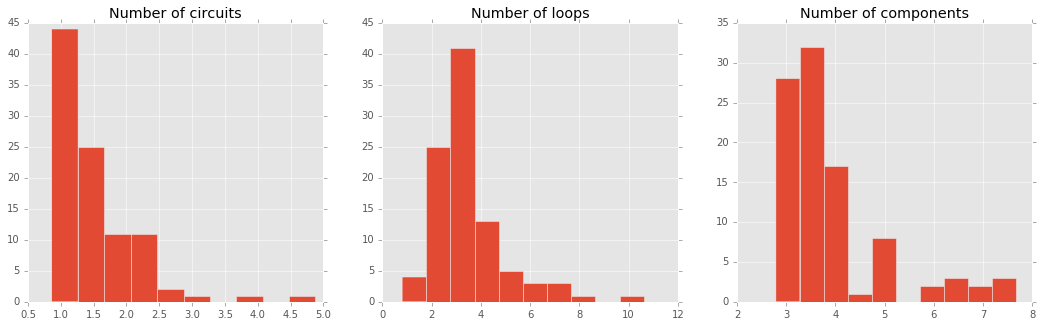

In [11]:
fig, axs = plt.subplots(1,3, figsize=(18,5))
df2 = df[df['Activity']!="a3"]
table1 = pd.pivot_table(df2, values='#circuits',columns=['student'], aggfunc=np.mean); table1.hist(ax=axs[0])
axs[0].set_title("Number of circuits")
table2 = pd.pivot_table(df2, values='#loops',columns=['student'], aggfunc=np.mean); table2.hist(ax=axs[1])
axs[1].set_title("Number of loops")
table3 = pd.pivot_table(df2, values='#components',columns=['student'], aggfunc=np.mean); table3.hist(ax=axs[2])
axs[2].set_title("Number of components")

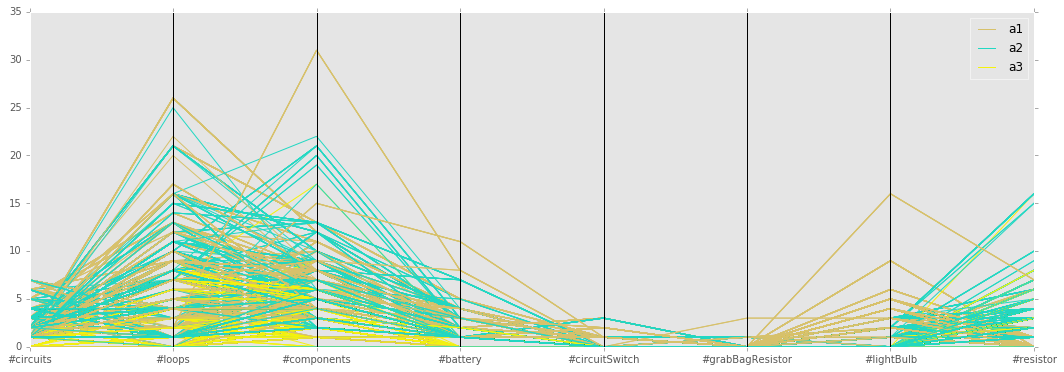

In [12]:
from pandas.tools.plotting import parallel_coordinates
plt.subplots(1,1, figsize=(18,6))
df2= df.dropna()
parallel_coordinates(df2[["Activity","#circuits","#loops","#components","#battery","#circuitSwitch","#grabBagResistor","#lightBulb","#resistor"]],"Activity")

Next let's look at how many different circuits the students make, and their complexity, per activity.

NameError: global name 'df2' is not defined

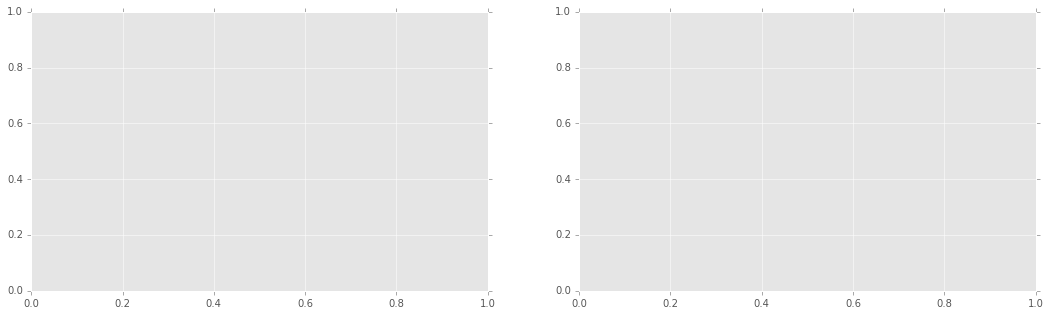

In [13]:
fig, axs = plt.subplots(1,2, figsize=(18,5))
bins = np.linspace(0, 25, 25)
ax=axs[0]
df2 = df[df['Activity']=="a1"]
students = get_students("scaffolding",'scaff')
circuits = get_circuits(df2, students)
ax.hist([len(s) for s in circuits.values()], bins, alpha = 0.4, label= "Scaffolded", normed=True)
students = get_students("scaffolding",'not')
circuits = get_circuits(df2, students)
ax.hist([len(s) for s in circuits.values()], bins, alpha = 0.4, label= "Not scaffolded", normed=True)
ax.legend(loc='upper right');ax.xlabel = 'Number of unique circuits';ax.ylabel = 'Count of students'
ax.set_title('Histogram of number of unique circuits in Activity 1')

ax=axs[1]
df2 = df[df['Activity']=="a2"]
students = get_students("scaffolding",'scaff')
circuits = get_circuits(df2, students)
ax.hist([len(s) for s in circuits.values()], bins, alpha = 0.4, label= "Scaffolded", normed=True)
students = get_students("scaffolding",'not')
circuits = get_circuits(df2, students)
ax.hist([len(s) for s in circuits.values()], bins, alpha = 0.4, label= "Not scaffolded", normed=True)
ax.legend(loc='upper right');ax.xlabel = 'Number of unique circuits';ax.ylabel = 'Count of students'
ax.set_title('Histogram of number of unique circuits in Activity 2')

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(18,5))
bins = np.linspace(0, 25, 25)
ax=axs[0]
df2 = df[df['Activity']=="a1"]
students = get_students("Clustergroups",'knowledge')
circuits = get_circuits(df2, students)
ax.hist([len(s) for s in circuits.values()], bins, alpha = 0.4, label= "High prior knowledge", normed = True)
students = get_students("Clustergroups",'attitude')
circuits = get_circuits(df2, students)
ax.hist([len(s) for s in circuits.values()], bins, alpha = 0.4, label= "High prior attitude", normed = True)
ax.legend(loc='upper right');ax.xlabel = 'Number of unique circuits';ax.ylabel = 'Count of students'
ax.set_title('Histogram of number of unique circuits in Activity 1')

ax=axs[1]
df2 = df[df['Activity']=="a2"]
students = get_students("Clustergroups",'knowledge')
circuits = get_circuits(df2, students)
ax.hist([len(s) for s in circuits.values()], bins, alpha = 0.4, label= "High prior knowledge", normed = True)
students = get_students("Clustergroups",'attitude')
circuits = get_circuits(df2, students)
ax.hist([len(s) for s in circuits.values()], bins, alpha = 0.4, label= "High prior attitude", normed = True)
ax.legend(loc='upper right');ax.xlabel = 'Number of unique circuits';ax.ylabel = 'Count of students'
ax.set_title('Histogram of number of unique circuits in Activity 2')

## Let's look at sequence of action types for Activity 2
For each student we want to find the number of transitions from one type of actions to another

First, we find what actions students are doing in consecutively. We count the number of succesive actions for each pair.
Next we plot the frequency of these pairs of events or pairs of "blocks" of events. A block is a success of events of the same family. The rows denote the "first" action and the columns correspond to the following action conducted.

### Heatmaps

In [ ]:
sequences = get_sequence(get_students())
df_actions = get_action_pairs(sequences,normalize=False)
df_actions_blocks = get_action_pairs_blocks(sequences,normalize=False)

fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(18,9))
ax = axs[0]
plot_heatmap(df_actions, ax, "Paired events")
ax = axs[1]
plot_heatmap(df_actions_blocks,ax, "Paired blocks of events")
plt.show()

Let's replot the heatmaps, this time normalizing the counts by the total number of counts of the firts action

In [ ]:
sequences = get_sequence(get_students())
df_actions = get_action_pairs(sequences,normalize=True)
df_actions_blocks = get_action_pairs_blocks(sequences,normalize=True)

fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(18,9))
ax = axs[0]
plot_heatmap(df_actions, ax, "Paired events")
ax = axs[1]
plot_heatmap(df_actions_blocks,ax, "Paired blocks of events")
plt.show()

### Now let's split by scaffolding group

In [ ]:
sequences = get_sequence(get_students('scaffolding','scaff'))
df_actions = get_action_pairs(sequences,normalize=True)
df_actions_blocks = get_action_pairs_blocks(sequences,normalize=True)

fig, axs = plt.subplots(nrows=2,ncols=2,figsize=(18,18))
ax = axs[0,0]
plot_heatmap(df_actions, ax, "Scaffolded students' paired events")
ax = axs[0,1]
plot_heatmap(df_actions_blocks,ax, "Scaffolded students' paired blocks of events")

sequences = get_sequence(get_students('scaffolding','not'))
df_actions = get_action_pairs(sequences,normalize=True)
df_actions_blocks = get_action_pairs_blocks(sequences,normalize=True)

ax = axs[1,0]
plot_heatmap(df_actions, ax, "Not scaffolded students' paired events")
ax = axs[1,1]
plot_heatmap(df_actions_blocks,ax, "Not scaffolded students' paired blocks of events")
plt.show()

In [ ]:
sequences_scaff = get_sequence(get_students('scaffolding','scaff'))
sequences_not = get_sequence(get_students('scaffolding','not'))
df_actions_diff = get_action_pairs(sequences_scaff,normalize=True) - get_action_pairs(sequences_scaff,normalize=True)
df_actions_blocks_diff = get_action_pairs_blocks(sequences_scaff,normalize=True) - get_action_pairs_blocks(sequences_not,normalize=True)

fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(18,9))
ax = axs[0]
plot_heatmap(df_actions_diff, ax, "Diff scaffolded VS. not paired events")
ax = axs[1]
plot_heatmap(df_actions_blocks_diff,ax, "Diff scaffolded VS. not' paired blocks of events")

## Let's look what actions are done during time intervals of the activity for a specific student for Activity 2
We count the number of times certain actions are performed, and normalize for each time block

In [ ]:
student = 10009106
sequence = sequences[student]
times =  list(df2[df2['student']==student]['Time Stamp'])
timeblocks = [times[x] for x in range(1,len(times)+2,len(times)/4)]
timeblocks.pop(0)
data_time = np.zeros((len(families),len(timeblocks)), dtype='float')
data_time_blocks = np.zeros((len(families),len(timeblocks)), dtype='float')
def find_index(time):
    i=0
    while time >= timeblocks[i]:
        i+=1
        if i+1==len(timeblocks): break
    return i

for i,(time,family) in enumerate(zip(times,sequence)):
    data_time[families.index(family)][find_index(time)] += 1
    if i +1 < len(sequence):
        if family != sequence[i+1]:
            data_time_blocks[families.index(family)][find_index(time)] += 1
data_time_blocks = data_time_blocks/np.sum(data_time_blocks,axis=0)
data_time_blocks 

In [ ]:
fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(15,7))
ax = axs[0]
row_labels = families
column_labels = ["1st","2nd","3rd","4th"]
heatmap = ax.pcolor(data_time, cmap=plt.cm.BuPu)
ax.set_xticks(np.arange(data_time.shape[1])+0.5, minor=False)
ax.set_yticks(np.arange(data_time.shape[0])+0.5, minor=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.set_xticklabels(column_labels, minor=False)
ax.set_yticklabels(row_labels, minor=False)
plt.text(0.5, 1.08, "Occurence of actions over quartiles of activity",fontsize=15,horizontalalignment='center',transform = ax.transAxes)

ax = axs[1]
heatmap = ax.pcolor(data_time_blocks, cmap=plt.cm.BuPu)
ax.set_xticks(np.arange(data_time_blocks.shape[1])+0.5, minor=False)
ax.set_yticks(np.arange(data_time_blocks.shape[0])+0.5, minor=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.set_xticklabels(column_labels, minor=False)
ax.set_yticklabels(row_labels, minor=False)
plt.text(0.5, 1.08, "Occurence of blocks actions over quartiles of activity",fontsize=15,horizontalalignment='center',transform = ax.transAxes)
plt.show() 

### sanity checks - what do we epxect?
* action frquency and sequences should be different between scaff and unscaff
* high pre K in scaff should have similar sequences - "successful sequences"
* higher variability of sequences in unscaffolded conditions
* does this difference transfer to the second activity?

### Next tasks:
1. calculate average number of pairs of action PER STUDENTS and redo plots
2. recreate heatmaps splitting students by:
    * cluster
    * high knowledge - low knowledge
    * high att - low att
    * learning gains
    * attitude gains (shifts up or down)

[2014 paper]{http://link.springer.com/chapter/10.1007/978-3-319-07221-0_43}

other ideas:
factor analysis of students by circuit max complexity, pairwise sequencing, #of different circuits they make
